In [9]:
from IPython.display import FileLink

In [10]:
%load_ext rpy2.ipython

The rpy2.ipython extension is already loaded. To reload it, use:
  %reload_ext rpy2.ipython


In [11]:
%%R
library(DESeq2)
library(phyloseq)
library(plyr); library(dplyr)
library(ggplot2)
library(doParallel)
library(foreach)
library(reshape)
library(RColorBrewer)
library(gridExtra)

In [12]:
%%R
dat = read.csv("/home/ashley/single_substrate/data/df_resp_SS_counts.csv",header=TRUE)

In [13]:
%%R
dat = dat %>% arrange(desc(Counts))
dat

            Phylum Counts Treatment
1   Proteobacteria     16    13CCSS
2  Verrucomicrobia      6    13CCPS
3  Verrucomicrobia      5    13CCSS
4   Proteobacteria      4    13CCPS
5      Chloroflexi      3    13CCSS
6      Chloroflexi      3    13CCPS
7   Planctomycetes      3    13CCPS
8    Bacteroidetes      2    13CCSS
9    Acidobacteria      1    13CCSS
10  Planctomycetes      1    13CCSS
11    Spirochaetes      1    13CCSS
12   Bacteroidetes      1    13CCPS
13   Cyanobacteria      1    13CCPS
14   Cyanobacteria      0    13CCSS
15   Acidobacteria      0    13CCPS
16    Spirochaetes      0    13CCPS


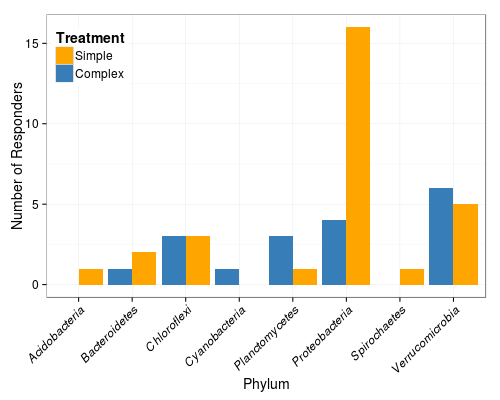

In [28]:
%%R -h 400 -w 500

colours = c("#377eb8","orange")

p = ggplot(dat, aes(y = Counts, x = Phylum, fill = Treatment, order = Counts))

#p = p + facet_grid(Treatment~Day)

p = p + geom_bar(stat = "identity", position = "dodge")

p = p + theme_bw()

p = p + theme(axis.text.x = element_text(hjust = 1, size = 12, angle = 45, face = "italic"), 
              axis.text.y = element_text(size = 12),
              axis.title = element_text(size = 14),
              legend.title = element_text(size = 14),
              legend.text = element_text(size = 12))

p = p + labs(fill = "Treatment", y = "Number of Responders")

p = p + scale_fill_manual(values = colours,
                            breaks=c("13CCSS", "13CCPS"),
                            labels=c("Simple", "Complex"))
#p = p + theme(axis.text.x = element_text(size = 14, angle = 45, hjust = 1, face = "italic"))
p = p + theme(legend.position=c(0.1,0.85))

p

In [29]:
%%R 
ggsave(plot = p, filename = "figs/Phylum_SS_bar.pdf", width = 7, height = 5)

In [30]:
FileLink("figs/Phylum_SS_bar.pdf")

/home/ashley/single_substrate/figs/Phylum_SS_bar.pdf